In [33]:
import pandas as pd

In [34]:
all_data = pd.read_csv('data/deaths/hospital_deaths.csv', index_col=0)

In [35]:
flipped = all_data.T

In [36]:
sorted_hosp = flipped.sort_values(by=flipped.columns[-1])
most = sorted_hosp[-11:-1].T

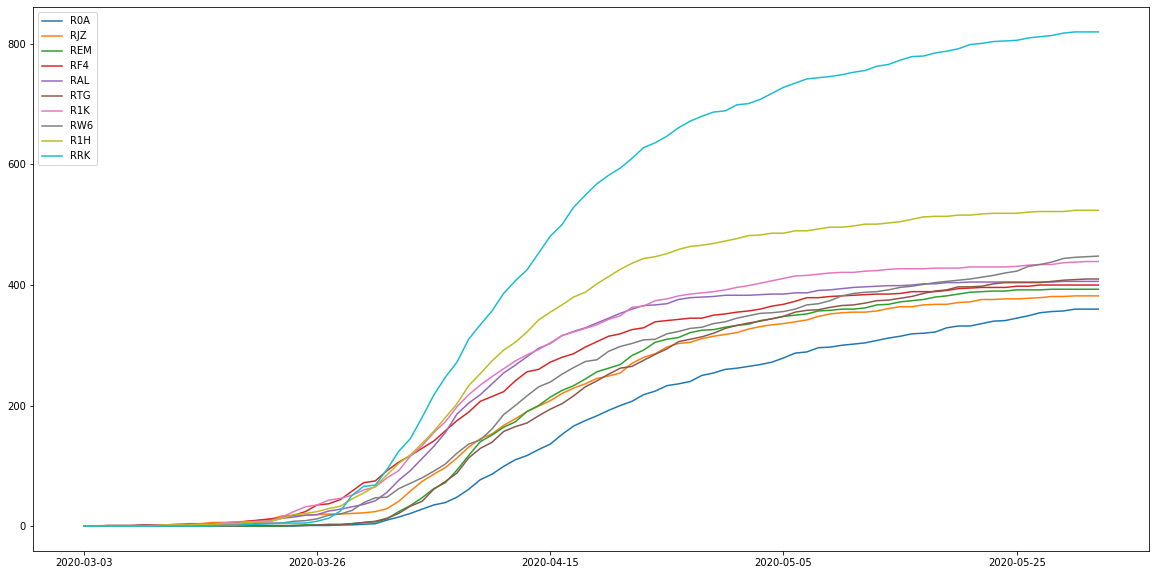

In [37]:
most.plot(figsize=(20, 10))

In [65]:
locations = pd.read_excel('data/deaths/trust_locations.xlsx', skiprows=4, header=1)

In [66]:
processed = locations.iloc[:, 1:4].dropna(axis=0, how='all')[:-2]

In [67]:
processed['HEE Region'] = processed['HEE Region'].ffill()

In [69]:
processed = processed.dropna()

In [94]:
code_to_name = dict(zip(processed['Organisation Code'].str.strip(), processed['Organisation Name']))

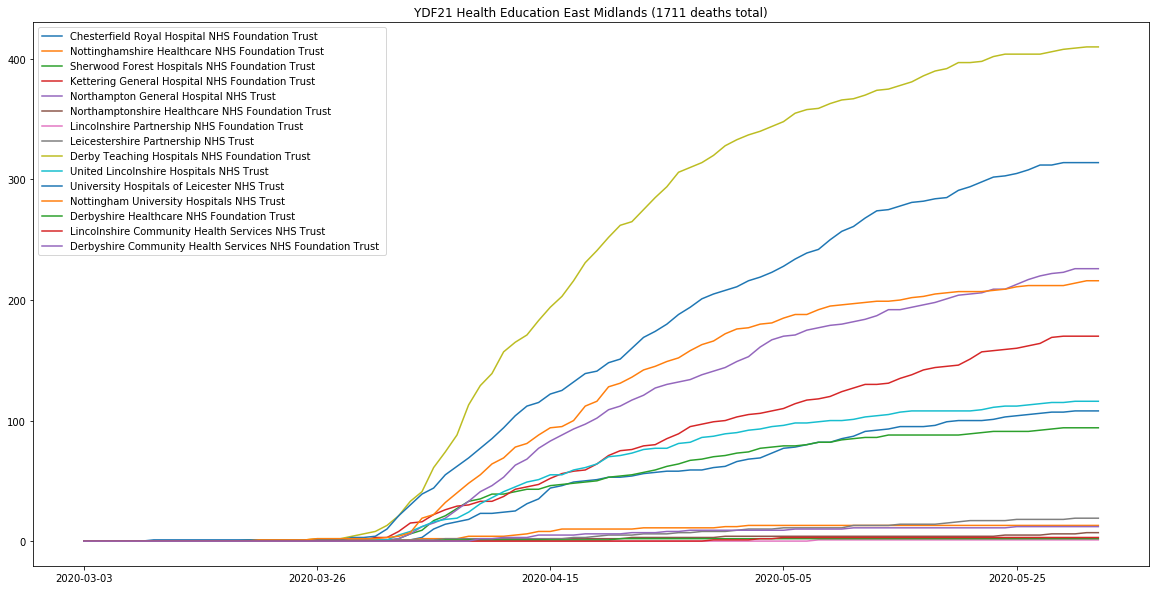

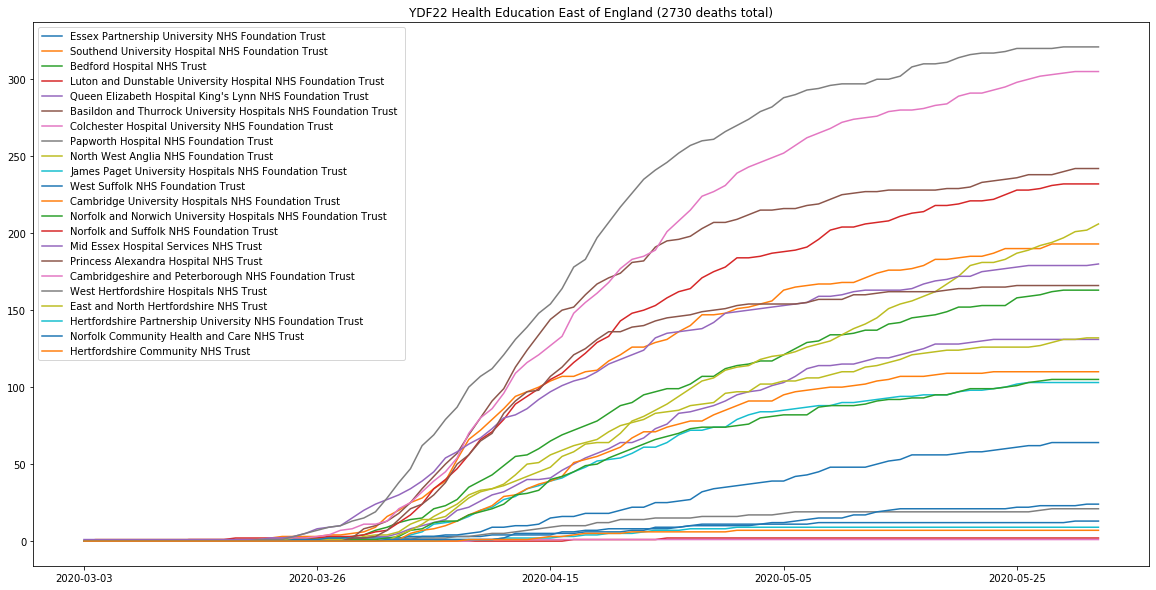

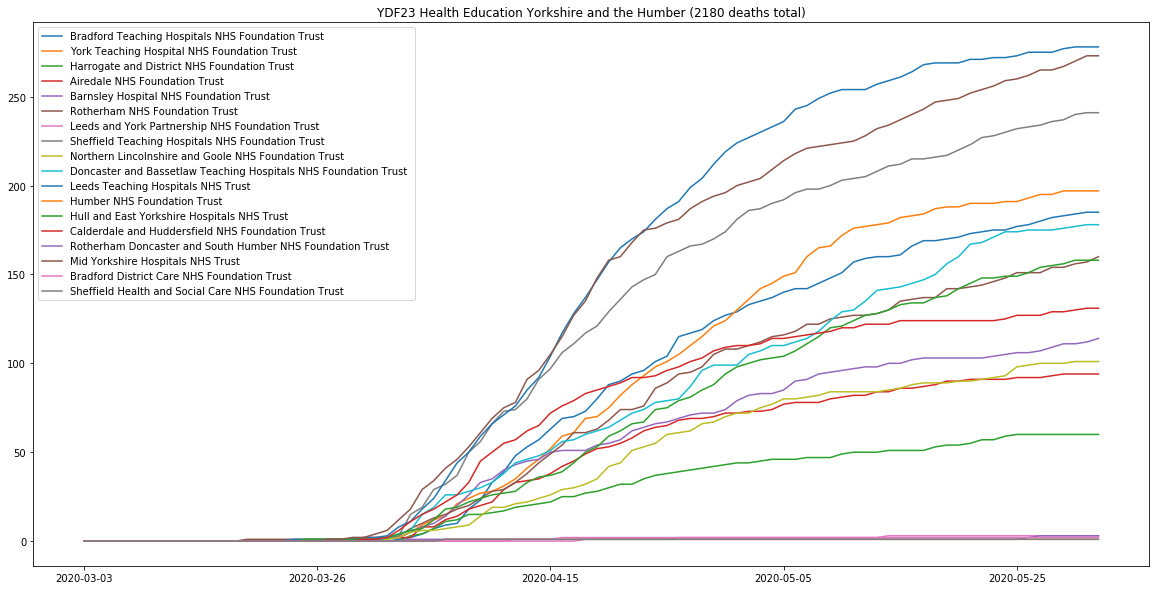

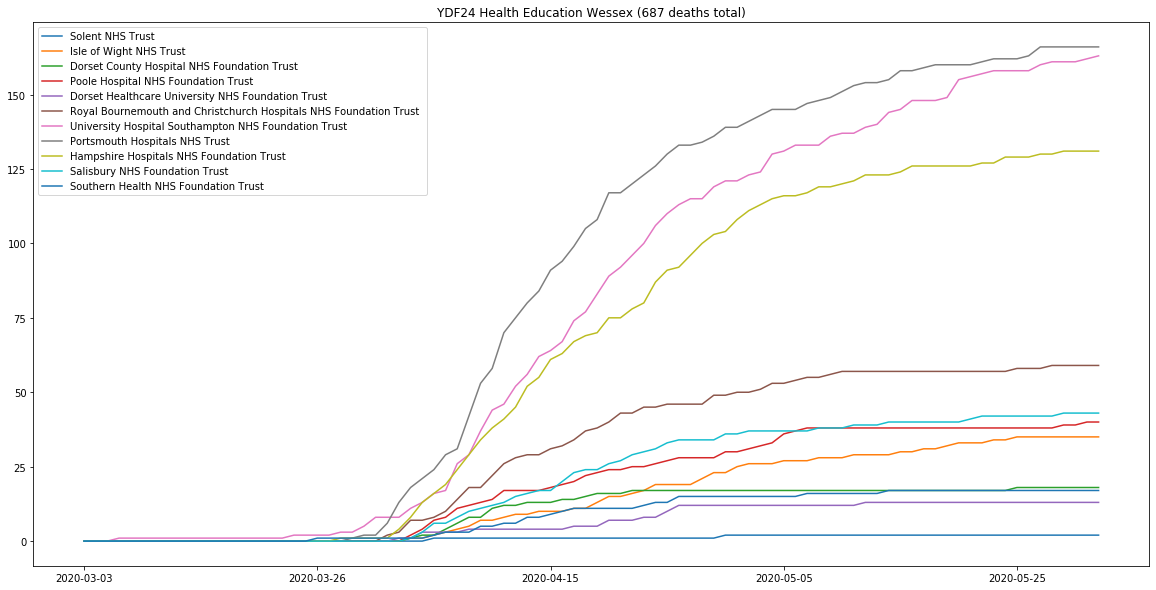

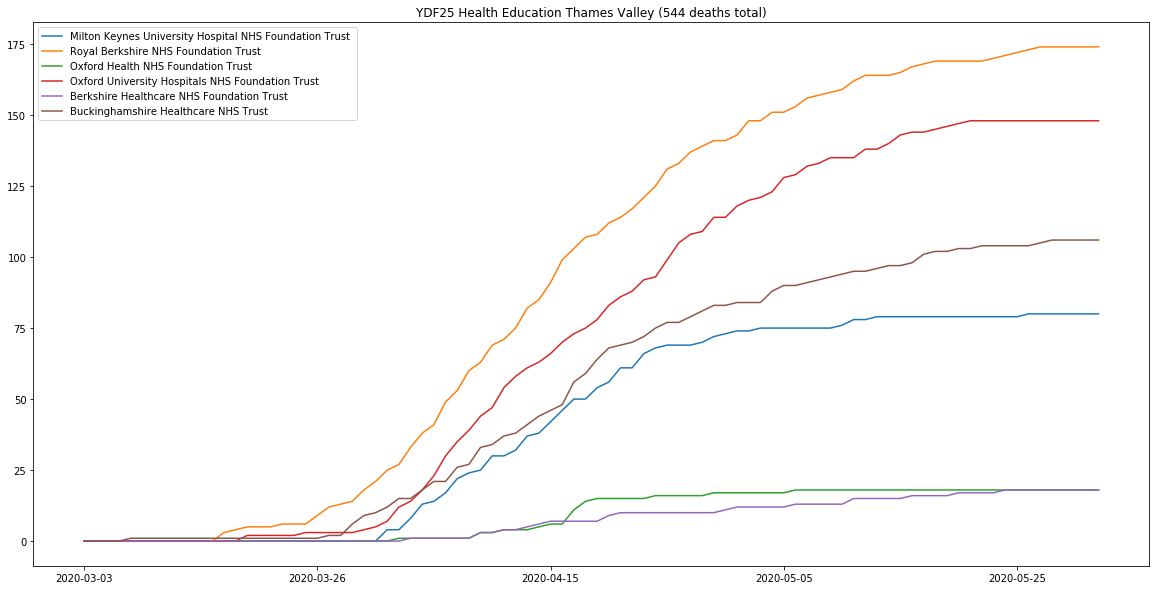

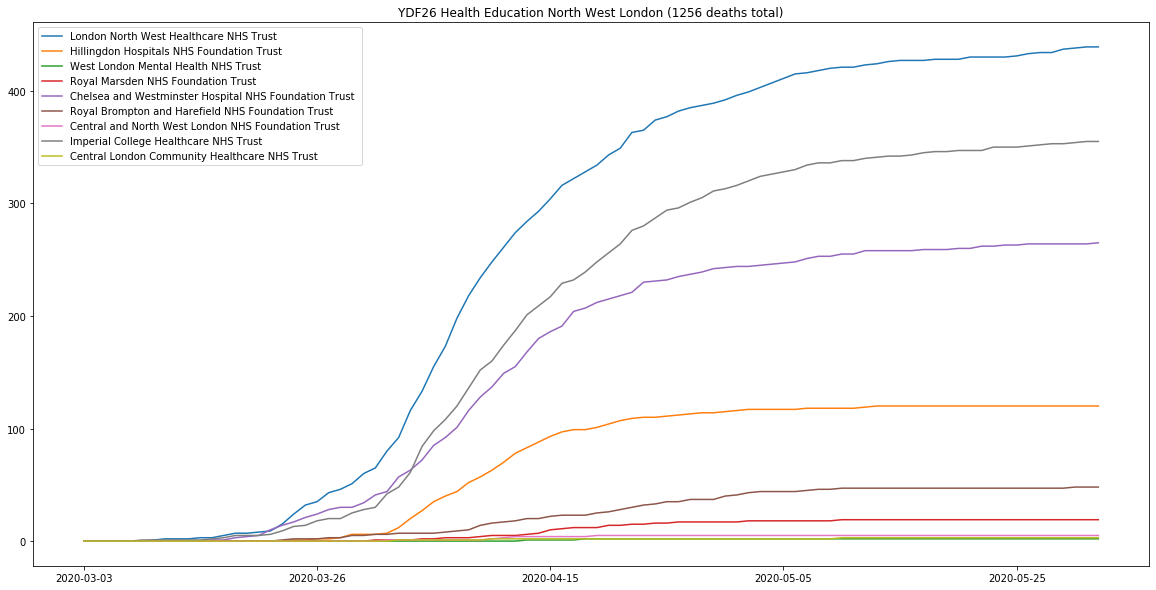

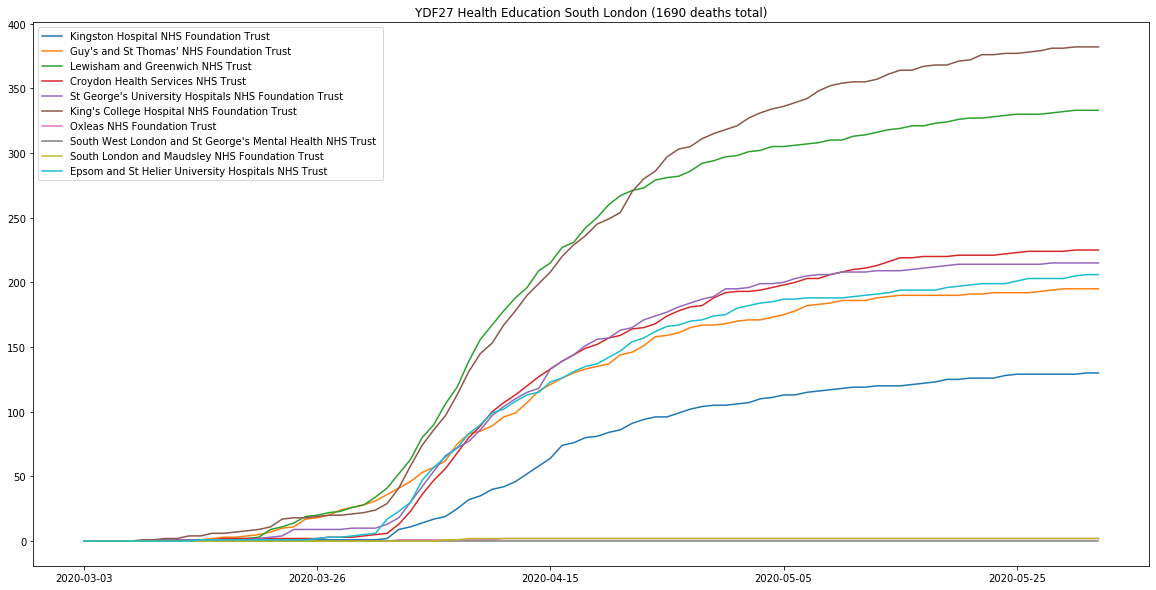

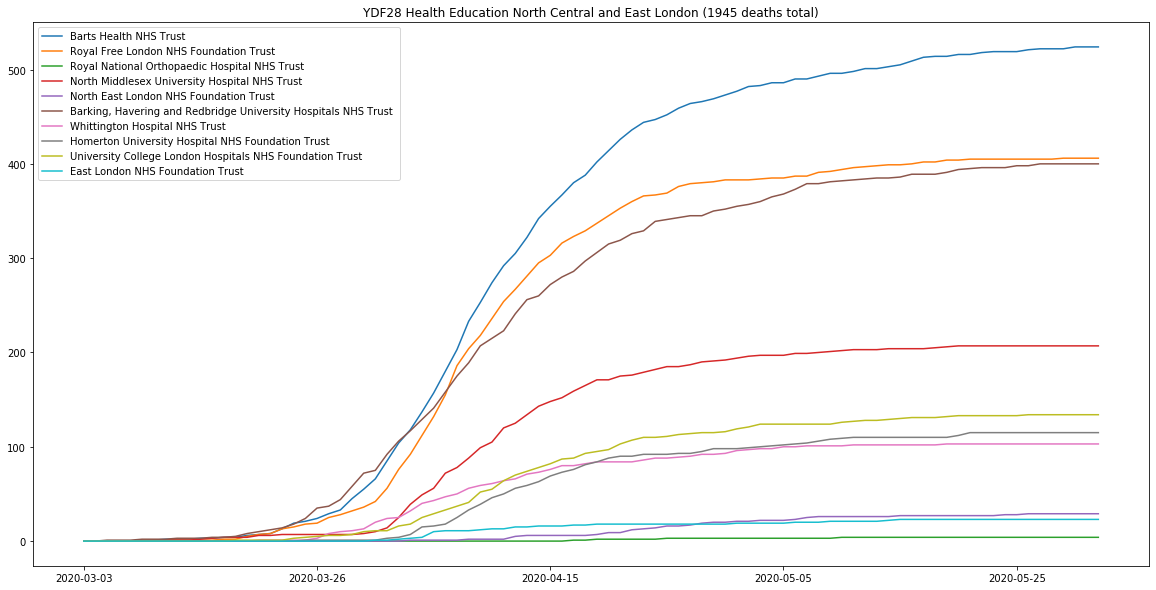

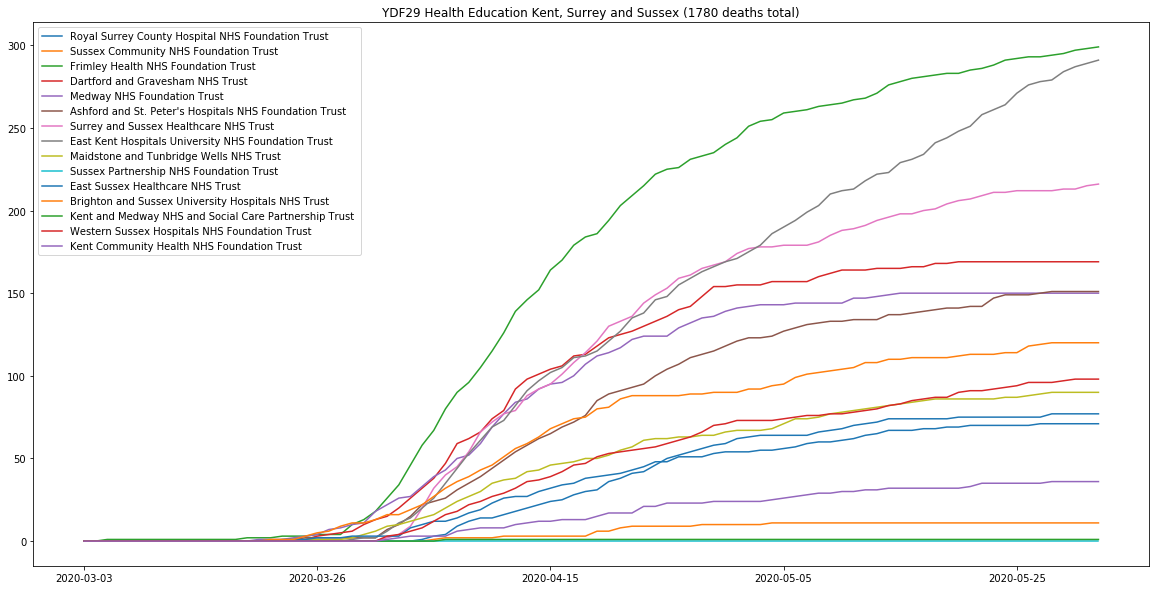

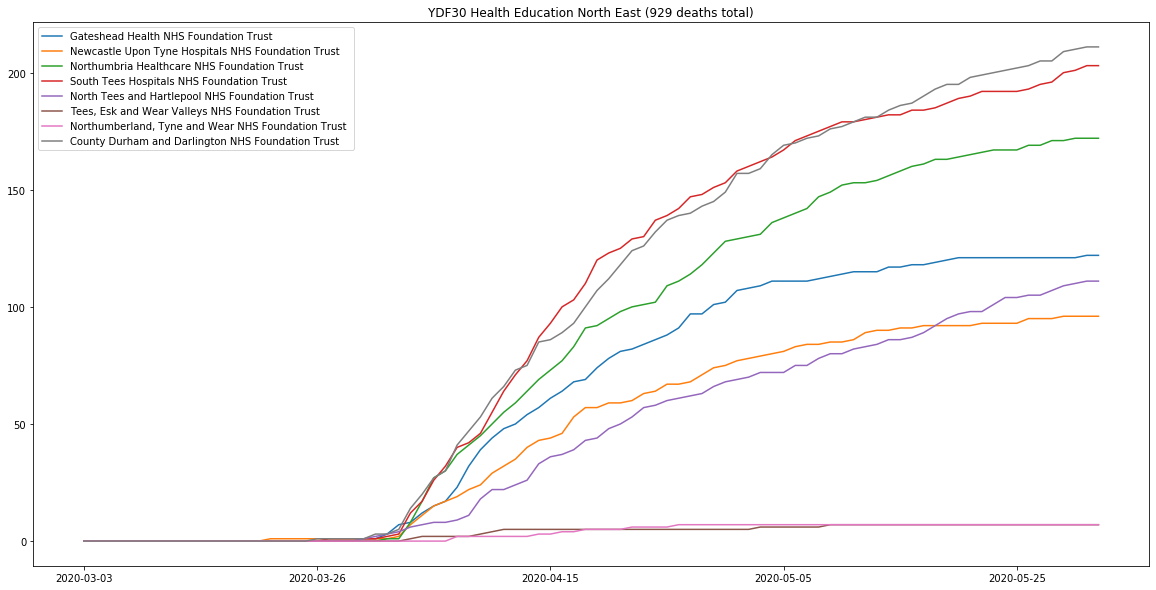

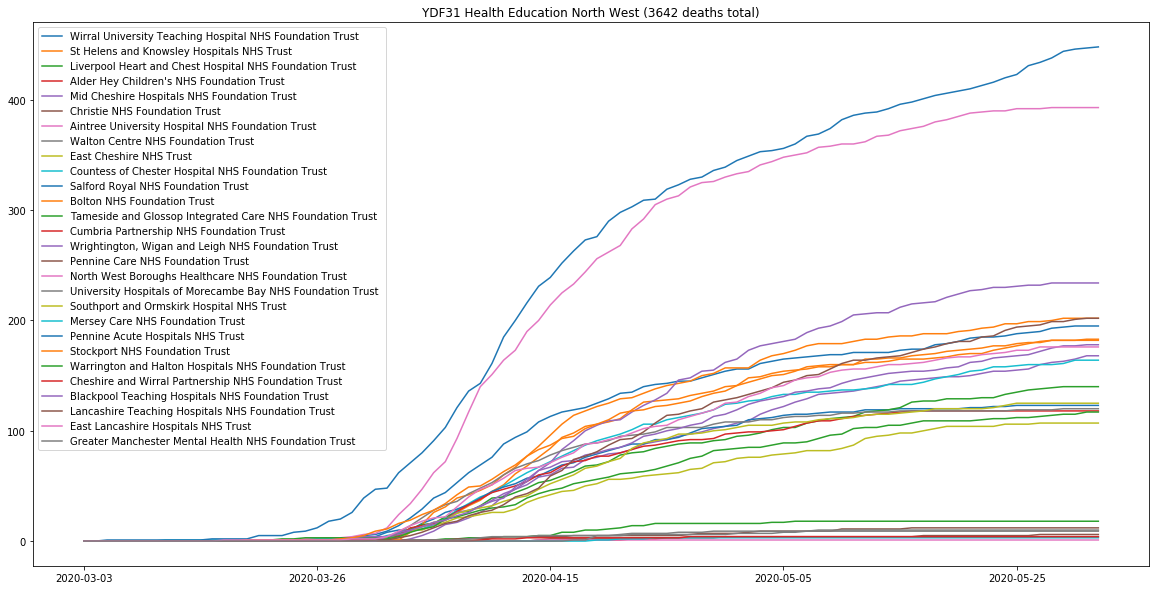

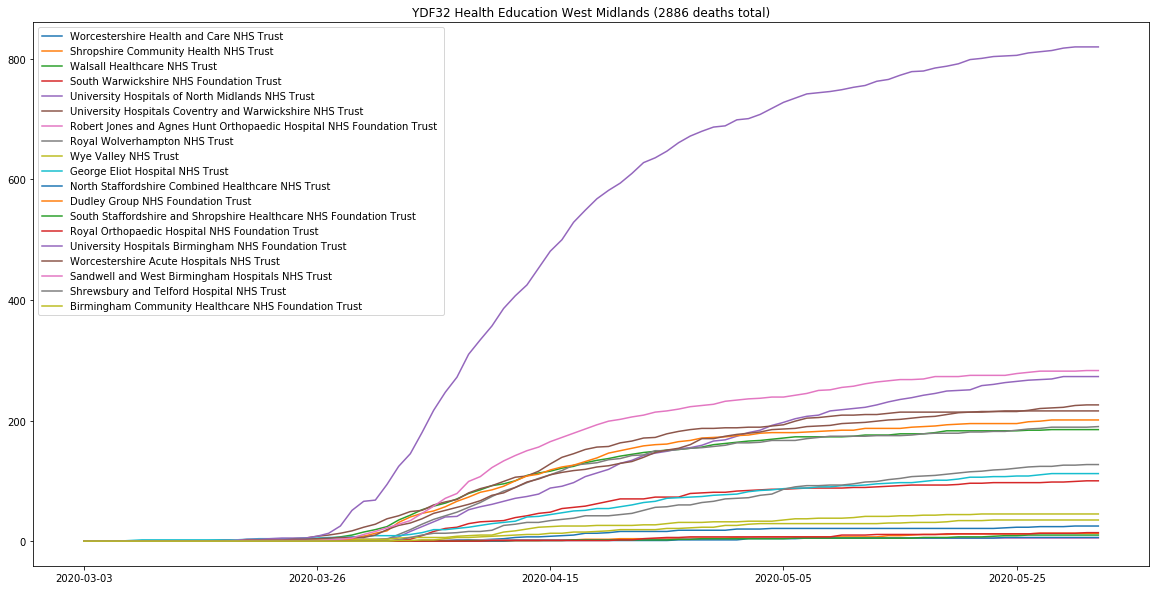

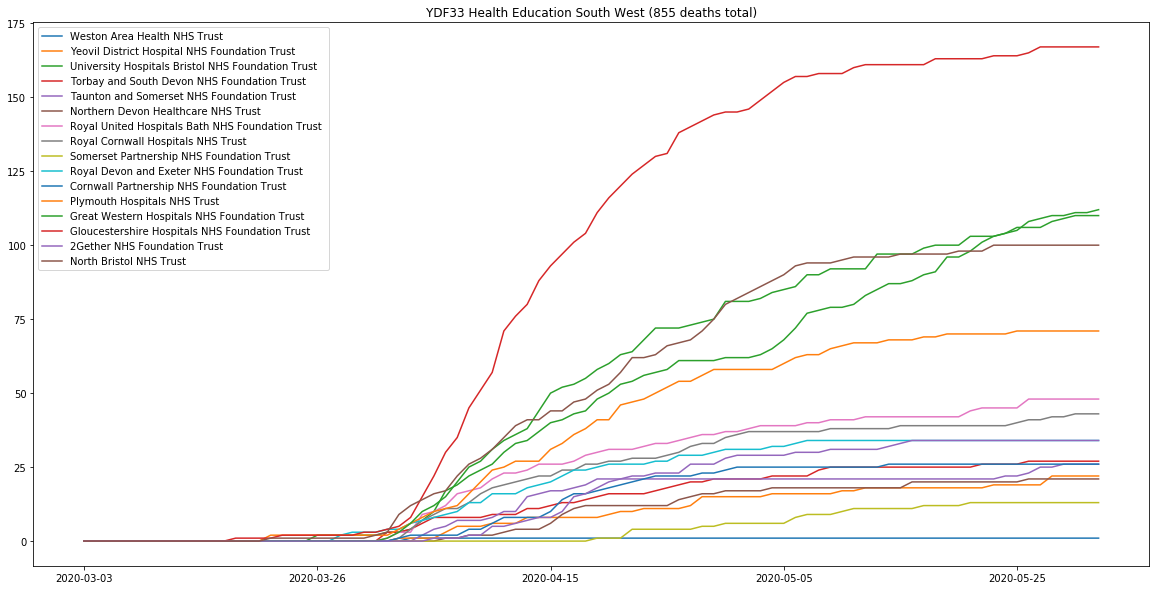

In [102]:
for region in processed['HEE Region'].unique():
    codes = processed.loc[processed['HEE Region'] == region, 
                          'Organisation Code'].values.tolist()
    stripped = [code.replace(' ', '') for code in codes]
    cols = [c for c in all_data.columns if c in stripped]
    
    subset = all_data[cols]
    subset.columns = map(code_to_name.get, subset.columns)
    
    total = f' ({int(subset.sum(axis=1)[-1])} deaths total)'
    
    subset.plot(figsize=(20,10), title=region+total)
    